### Import Libraries

In [2]:
import pandas as pd
import os

### Merging all the 12 CSV file to one file

In [3]:
files = [file for file in os.listdir('D:\Data Analytics\Projects\YoutubeProjects\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

allMonthsData = pd.DataFrame()

for file in files:
    df = pd.read_csv('D:\Data Analytics\Projects\YoutubeProjects\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/'+file)
    allMonthsData = pd.concat([allMonthsData, df])
    
allMonthsData.to_csv('allMonthsData.csv', index=False)

### Read in updated Da

In [4]:
allData = pd.read_csv('allMonthsData.csv')
allData.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035"
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"


In [5]:
# Convert 'Order ID' to int
allData['Order ID'] = pd.to_numeric(allData['Order ID'], errors='coerce').astype('Int64')

# Convert 'Product' to string
allData['Product'] = allData['Product'].astype(str)

# Convert 'Quantity Ordered' to int
allData['Quantity Ordered'] = pd.to_numeric(allData['Quantity Ordered'], errors='coerce').astype('Int64')

# Convert 'Price Each' to float
allData['Price Each'] = pd.to_numeric(allData['Price Each'], errors='coerce').astype(float)

# Convert 'Order Date' to datetime
allData['Order Date'] = pd.to_datetime(allData['Order Date'], errors='coerce')

# Convert 'Purchase Address' to string
allData['Purchase Address'] = allData['Purchase Address'].astype(str)

## Augment data with additinal columns

### Adding month column

In [6]:
# Add new columns for month and year

# Convert "Order Date" to datetime format
allData['Order Date'] = pd.to_datetime(allData['Order Date'], format='%m/%d/%y %H:%M')

# Add new columns for month and year
allData['Month'] = allData['Order Date'].dt.strftime('%b')
allData['Year'] = allData['Order Date'].dt.year.astype('Int64')

allData

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019
1,<NA>,nan,<NA>,NaN,NaT,nan,NaN,<NA>
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019


In [7]:
allData.isna().sum()

Order ID            900
Product               0
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address      0
Month               900
Year                900
dtype: int64

In [8]:
df_cleaned = allData.dropna()

In [9]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,2019
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019


In [10]:
df_cleaned.loc[:, 'Sales'] = df_cleaned['Quantity Ordered'] * df_cleaned['Price Each']

df_cleaned

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\4151070741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Sales'] = df_cleaned['Quantity Ordered'] * df_cleaned['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019,23.9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,600.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,2019,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019,700.0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019,700.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019,379.99


## Q1- What was the best month for sales? How much was earned that month?

In [11]:
bestSalesMonth =  df_cleaned.groupby(['Month', 'Year'])['Sales'].sum()

# Find the month with the highest total sales
best_month = bestSalesMonth.idxmax()
best_month_sales = bestSalesMonth.max()

best_month_sales

4613443.34

In [12]:
print(f"The best month for sales was {best_month[1]}/{best_month[0]} with earnings of ${best_month_sales:,.2f}.")

The best month for sales was 2019/Dec with earnings of $4,613,443.34.


In [13]:
result = df_cleaned.groupby('Month').sum()
result

,Order ID,Quantity Ordered,Price Each,Year,Sales
Month,,,,,
Apr,3387347100,20558,3367671.02,36905301,3390670.24
Aug,2899373917,13448,2230345.42,24149259,2244467.88
Dec,7685904705,28114,4588415.41,50442696,4613443.34
Feb,1871052592,13449,2188884.72,24177525,2202022.42
Jan,1421630798,10903,1811768.38,19602505,1822256.73
Jul,3284139576,16072,2632539.56,28857567,2647775.76
Jun,2932976072,15253,2562025.61,27365526,2577802.26
Mar,2564810956,17005,2791207.83,30593907,2807100.38
May,3345871523,18667,3135125.13,33446754,3152606.75


In [14]:
import matplotlib.pyplot as plt

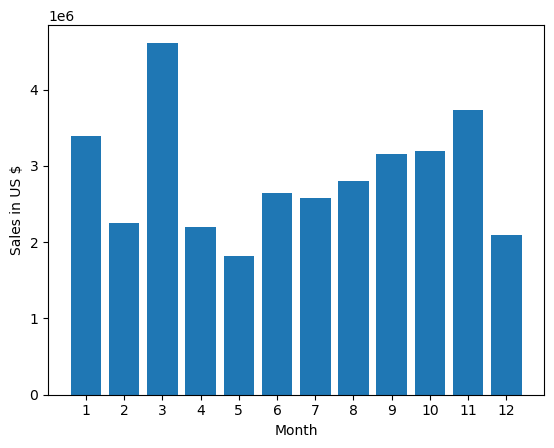

In [15]:
months= range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US $')
plt.xlabel('Month')
plt.show()

# Q2- What city had the highest number of sales? 

In [16]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019,23.9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,600.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,2019,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019,700.0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019,700.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019,379.99


In [17]:
# Add 'City' column by extracting the middle name from 'Purchase Address'
df_cleaned['City'] = df_cleaned['Purchase Address'].apply(lambda x: x.split(', ')[1])

# Print or use the DataFrame with the new 'City' column
display(df_cleaned[['Purchase Address', 'City']])

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\77848663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['City'] = df_cleaned['Purchase Address'].apply(lambda x: x.split(', ')[1])


,Purchase Address,City
0,"917 1st St, Dallas, TX 75001",Dallas
2,"682 Chestnut St, Boston, MA 02215",Boston
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...
186845,"840 Highland St, Los Angeles, CA 90001",Los Angeles
186846,"216 Dogwood St, San Francisco, CA 94016",San Francisco
186847,"220 12th St, San Francisco, CA 94016",San Francisco
186848,"511 Forest St, San Francisco, CA 94016",San Francisco


In [18]:
bestSalesCity =  df_cleaned.groupby(['City'])['Sales'].sum()

# Find the month with the highest total sales
best_city = bestSalesCity.idxmax()
best_city_sales = bestSalesCity.max()

bestSalesCity

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas            2767975.4
Los Angeles       5452570.8
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: Float64

In [19]:
print(f"The best City for sales was {best_city} with earnings of ${best_city_sales:,.2f}.")

The best City for sales was San Francisco with earnings of $8,262,203.91.


## Q3- Best time for Ad

In [20]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned['Hour'] = df_cleaned['Order Date'].dt.hour
df_cleaned['Minute'] = df_cleaned['Order Date'].dt.minute
df_cleaned

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\784636568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\784636568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Order Date'].dt.hour
C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\784636568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019,23.9,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,600.0,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,2019,11.99,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019,8.97,Los Angeles,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019,700.0,San Francisco,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019,700.0,San Francisco,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019,379.99,San Francisco,17,30


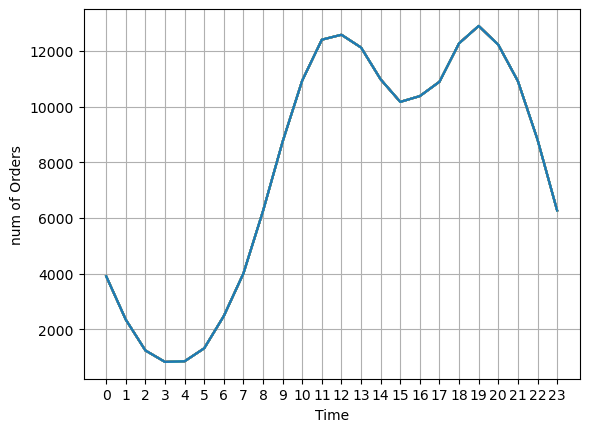

In [21]:
hours = [hour for hour, df in df_cleaned.groupby('Hour')]

plt.plot(hours, df_cleaned.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('num of Orders')
plt.xlabel('Time')
plt.grid()
plt.show()

## Q4- What Products are most often sold together?

In [22]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019,23.9,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,600.0,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,2019,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,2019,11.99,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,2019,8.97,Los Angeles,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,2019,700.0,San Francisco,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,2019,700.0,San Francisco,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,2019,379.99,San Francisco,17,30


In [45]:
df_cleaned_duplicated = df_cleaned[df_cleaned['Order ID'].duplicated(keep=False)]

df_cleaned_duplicated['Product Grouped'] = df_cleaned_duplicated.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df_cleaned_duplicated = df_cleaned_duplicated[['Order ID', 'Product Grouped']].drop_duplicates()

df_cleaned_duplicated.head(10)

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\1945011469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_duplicated['Product Grouped'] = df_cleaned_duplicated.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [48]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_cleaned_duplicated['Product Grouped']:
    row_list=row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sell the most and why do you think it sold the most?

In [55]:
df_cleaned.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,2019,23.9,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,2019,99.99,Boston,22,30


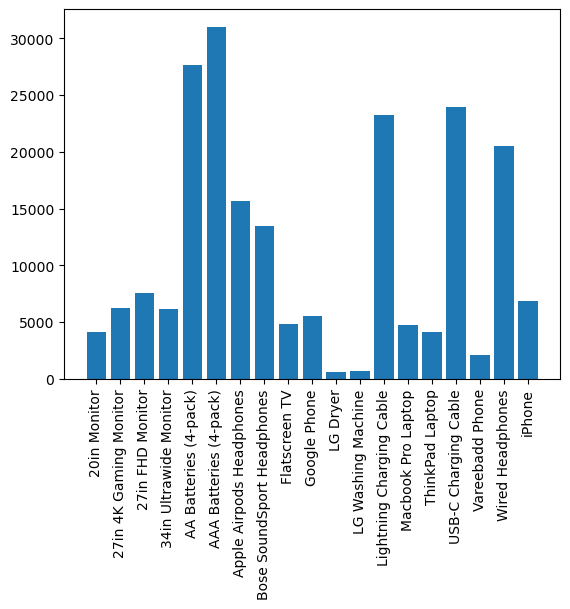

In [57]:
productGroup = df_cleaned.groupby('Product')
quantityOrdered = productGroup.sum()['Quantity Ordered']

products = [product for product, df_cleaned in productGroup]

plt.bar(products, quantityOrdered)

plt.xticks(products, rotation='vertical', size=10)

plt.show()

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_10096\542841740.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


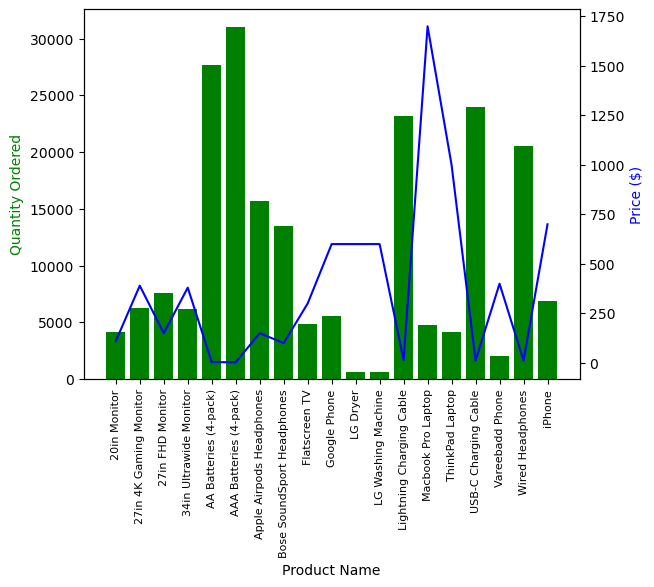

In [63]:
prices = df_cleaned.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantityOrdered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()